<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-582425-1694712726/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('Mall_Customers.csv')
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.shape        # checking the dimension of data

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isna().sum()       # no null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

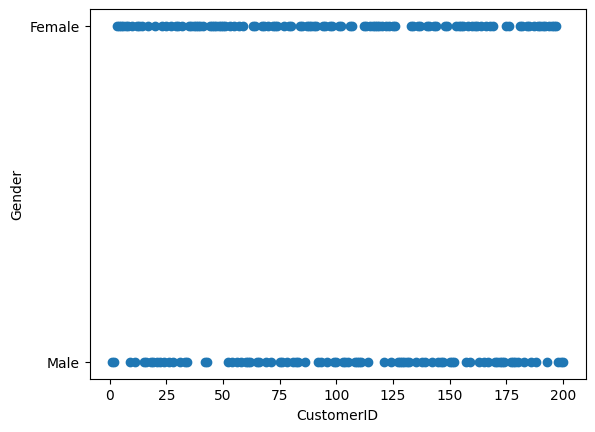

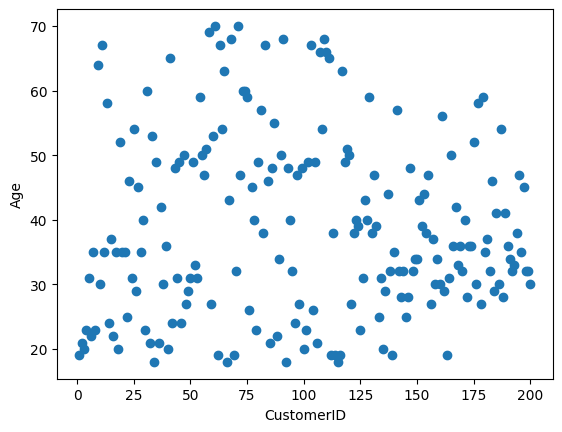

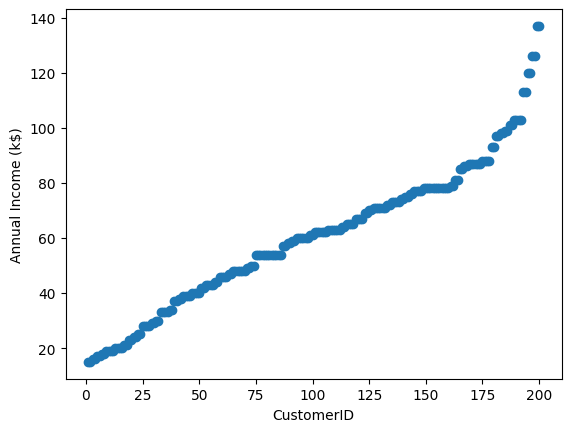

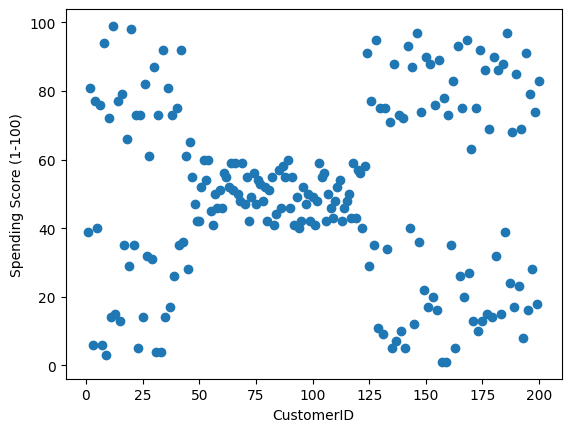

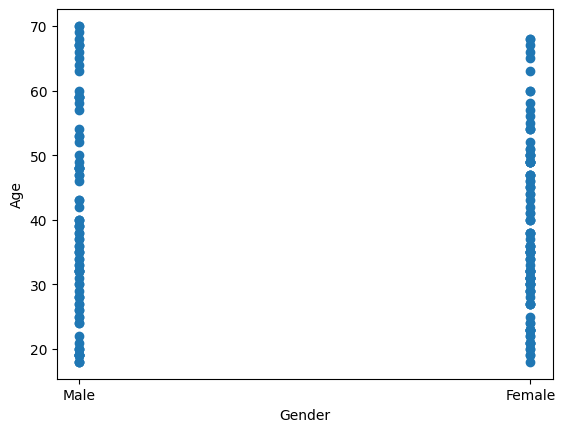

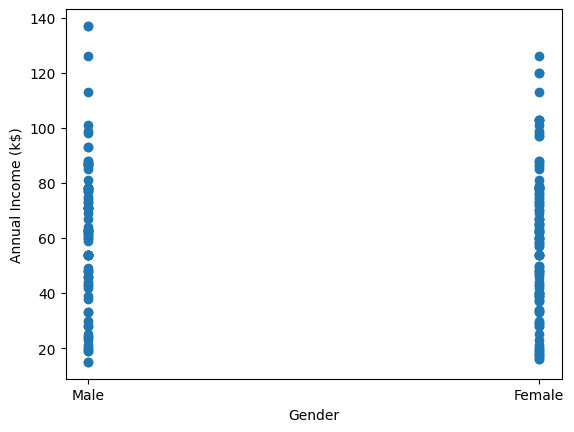

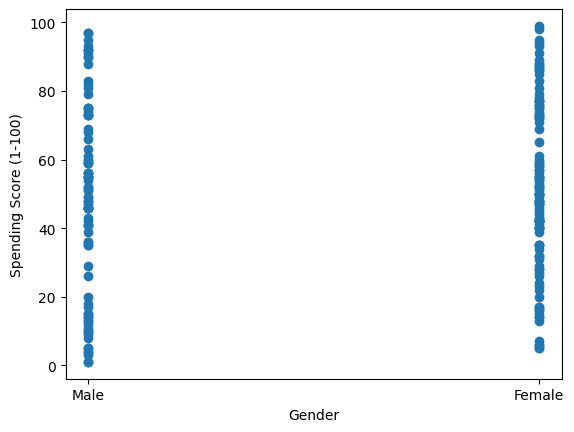

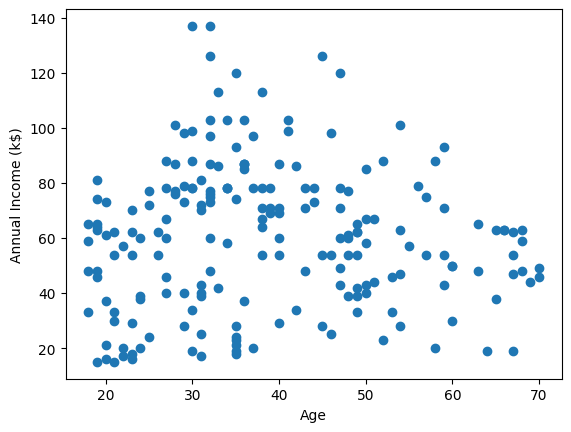

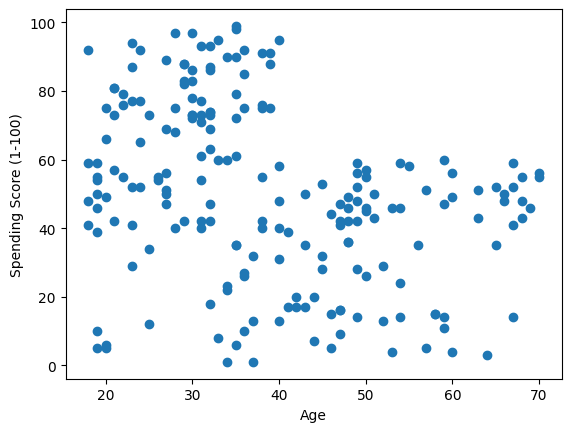

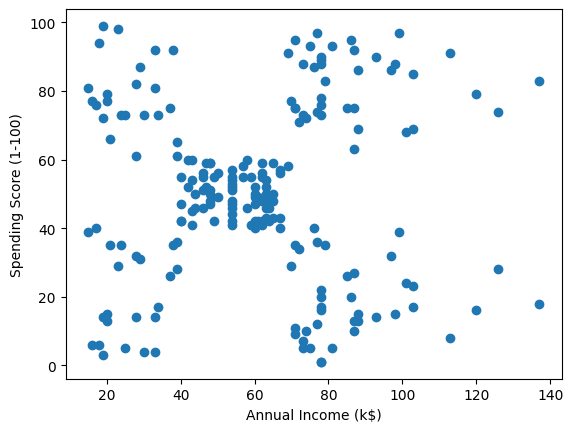

In [6]:
# VISUALISATION

graph = [i for i in data]
for i in range(0,len(graph)):
  for j in range(i,len(graph)):
    if(i!=j):
      plt.scatter(data[graph[i]],data[graph[j]],label=True)
      plt.xlabel(graph[i])
      plt.ylabel(graph[j])
      plt.show()

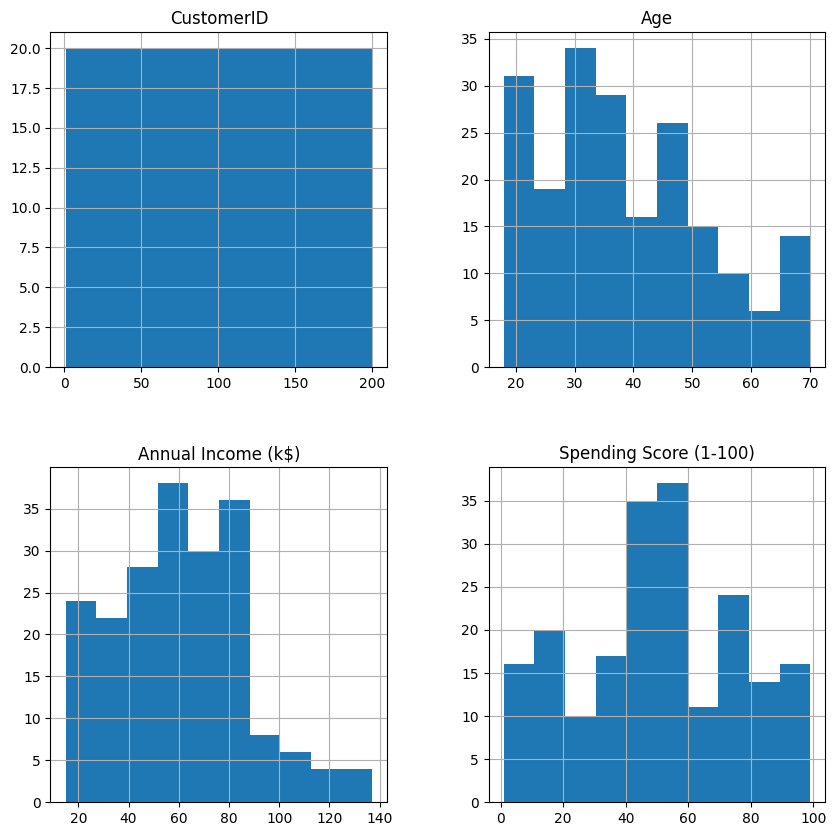

In [5]:
data.hist(figsize=(10,10))
plt.show()


In [ ]:
# ENCODING THE OBJECT DATA

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [ ]:
import numpy as np
upper_bound = 0
lower_bound = 0
for k, v in data.items():
        quantile_1 = v.quantile(0.25) #THis will take 25% of lowest values in each column
        quantile_3 = v.quantile(0.75)#This will take 25% of hightest values in each columns
        inter_quantile_range = quantile_3 - quantile_1#Inter quantile range is simply the difference between 25% highest and 25% lowest values
        v_col = v[(v <= quantile_1 - 1.5 * inter_quantile_range) | (v >= quantile_3 + 1.5 * inter_quantile_range)] #Basically if it is higher than top 25% quartile + 1.5 times quartile range or if it is lower than bottom 25% quartile - 1.5 times of IQR we call it a outlier
        percentage_of_outliers = np.shape(v_col)[0] / np.shape(data)[0]
        print(k,end=" : ")
        print(percentage_of_outliers*100)


CustomerID : 0.0
Gender : 0.0
Age : 0.0
Annual Income (k$) : 1.0
Spending Score (1-100) : 0.0


In [ ]:

for k, v in data.items():

      quantile_1 = v.quantile(0.25)#THis will take 25% of lowest values in each column
      quantile_3 = v.quantile(0.75)#This will take 25% of hightest values in each columns
      inter_quantile_range = quantile_3 - quantile_1#Inter quantile range is simply the difference between 25% highest and 25% lowest values
      v_col = v[(v <= quantile_1 - 1.5 * inter_quantile_range) | (v >= quantile_3 + 1.5 * inter_quantile_range)] #Basically if it is higher than top 25% quartile + 1.5 times quartile range or if it is lower than bottom 25% quartile - 1.5 times of IQR we call it a outlier
      if(k=='Annual Income (k$)'):
        lower_bound_ai=quantile_1-1.5*inter_quantile_range
        upper_bound_ai=quantile_3+1.5*inter_quantile_range


In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
for i in range(0,len(data['Annual Income (k$)'])):
  data['Annual Income (k$)'][i]=data['Annual Income (k$)'][i] if data['Annual Income (k$)'][i]>lower_bound_ai and data['Annual Income (k$)'][i]<upper_bound_ai else data['Annual Income (k$)'].median()

In [ ]:
import numpy as np
upper_bound = 0
lower_bound = 0
for k, v in data.items():
        quantile_1 = v.quantile(0.25)#THis will take 25% of lowest values in each column
        quantile_3 = v.quantile(0.75)#This will take 25% of hightest values in each columns
        inter_quantile_range = quantile_3 - quantile_1#Inter quantile range is simply the difference between 25% highest and 25% lowest values
        v_col = v[(v <= quantile_1 - 1.5 * inter_quantile_range) | (v >= quantile_3 + 1.5 * inter_quantile_range)] #Basically if it is higher than top 25% quartile + 1.5 times quartile range or if it is lower than bottom 25% quartile - 1.5 times of IQR we call it a outlier
        percentage_of_outliers = np.shape(v_col)[0] / np.shape(data)[0]
        print(k,end=" : ")
        print(percentage_of_outliers*100)


CustomerID : 0.0
Gender : 0.0
Age : 0.0
Annual Income (k$) : 0.0
Spending Score (1-100) : 0.0


In [ ]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data = scaler.transform(data)

In [ ]:
data_c = []
data_g = []
data_ag = []
data_ai = []
data_s = []
for i in range(0,len(data)):
  for j in range(0,len(data[i])):
    if(j%5==0):
      data_c.append(data[i][j])
    elif(j%5==1):
      data_g.append(data[i][j])
    elif(j%5==2):
      data_ag.append(data[i][j])
    elif(j%5==3):
      data_ai.append(data[i][j])
    elif(j%5==4):
      data_s.append(data[i][j])
print(data[0])
data_scaled = {
    'CustomerID': data_c,
    'Gender': data_g,
    'Age': data_ag,
    'Annual Income (k$)':data_ai,
    'Spending Score (1-100)':data_s
}

[0.         1.         0.01923077 0.         0.3877551 ]


In [ ]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.009009,0.051020
3,0.015075,0.0,0.096154,0.009009,0.775510
4,0.020101,0.0,0.250000,0.018018,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.945946,0.795918
196,0.984925,0.0,0.519231,1.000000,0.275510
197,0.989950,1.0,0.269231,1.000000,0.744898
198,0.994975,1.0,0.269231,0.418919,0.173469


In [ ]:
data_scaled.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         65
Spending Score (1-100)     84
dtype: int64

In [ ]:
data = data_scaled.drop('CustomerID',axis=1)

In [ ]:
# let the cluster = 4
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(data)
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, 3, 3, 3, 0, 3, 2, 3, 2, 3, 0, 3, 2, 1, 0, 1, 2, 3, 2, 1,
       0, 1, 0, 1, 0, 1, 0, 3, 2, 3, 2, 1, 0, 3, 0, 3, 0, 3, 0, 1, 2, 3,
       0, 3, 0, 3, 3, 3, 0, 1, 3, 2, 0, 2, 0, 2, 3, 2, 2, 1, 0, 0, 2, 1,
       0, 0, 1, 3, 2, 0, 0, 0, 2, 1, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2, 0, 3,
       3, 0, 0, 1, 2, 0, 3, 1, 0, 3, 2, 1, 3, 0, 2, 1, 2, 3, 0, 2, 2, 2,
       2, 3, 0, 1, 3, 3, 0, 0, 0, 0, 1, 0, 3, 1, 3, 3, 2, 1, 2, 1, 2, 1,
       3, 3, 2, 3, 0, 1, 2, 3, 0, 1, 3, 3, 2, 1, 2, 3, 0, 1, 2, 1, 0, 3,
       0, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 0, 1, 2, 1, 2, 1, 0, 3,
       2, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 1, 0, 3, 0, 3, 2, 3, 0, 3, 0, 1,
       2, 1], dtype=int32)

In [ ]:
data['cluster_kmeans'] = y_predicted
data.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster_kmeans
0,1.0,0.019231,0.000000,0.387755,1,1
1,1.0,0.057692,0.000000,0.816327,1,1
2,0.0,0.038462,0.009009,0.051020,0,0
3,0.0,0.096154,0.009009,0.775510,3,3
4,0.0,0.250000,0.018018,0.397959,3,3


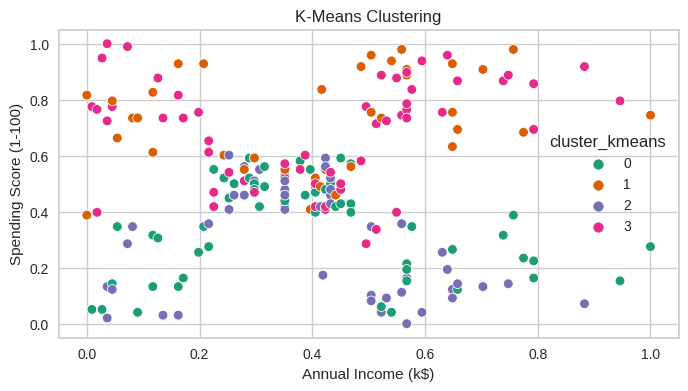

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_kmeans', palette='Dark2')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=10)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data)

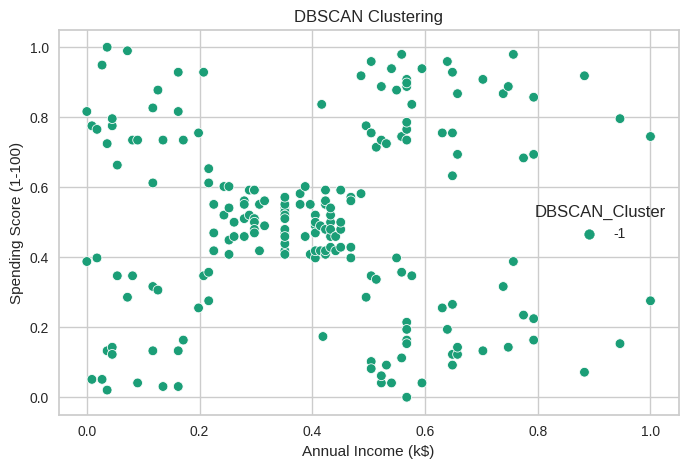

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='Dark2')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
data['Hierarchical_Cluster'] = hierarchical.fit_predict(data)

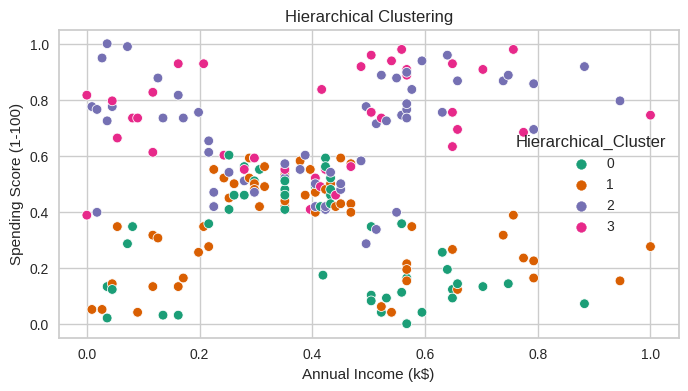

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', palette='Dark2')
plt.title('Hierarchical Clustering')
plt.show()